In [12]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
%matplotlib inline

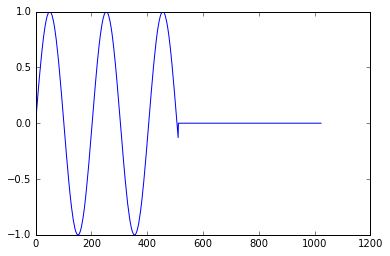

In [6]:
N=1024 #adc=N\2
N2=int(N/2)
data=np.loadtxt('kurumi_1024_LowC1.dat', delimiter=',')

N=1024
N2=int(N/2)
x=data
x=(x-512)/512
x[N2:N] = np.zeros(N2)
plt.plot(x)

In [54]:
def funcM(_x2,t):
    ret=sum(_x2[0:N2])+sum(_x2[t:N2+t])
    return ret
def funcMs(_x2):
    m=np.zeros(N2)
    for i in np.arange(N2):
        m[i]=funcM(_x2,i)
    return m

In [55]:
# return M[] array
def funcMsEx(_x2,_r0) :
    ms=np.zeros(N)
    ms[0]=2*_r0
    for i in np.arange(1,N2-1,1) :
        ms[i]=ms[i-1]-_x2[i-1]+_x2[N2+i]
    return ms[0:N2]

-- ms --
[ 60.85545974  60.85545974  60.85545974  60.85545974  60.85545974
  60.85545974  60.85545974  60.85545974  60.85545974  60.85545974]
max r= 30.4277298711 , max m= 60.8554597422
-- nsdf --


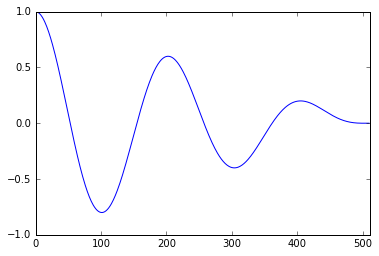

In [64]:
a=123 # factor to adjust overflow if necessary

# overflow considering
F=np.fft.fft(x)/N                  #scale to avoid overflow here
ps=np.real(F*np.conjugate(F))*N*a  #multiply N to get better resolution
ifftps=np.fft.ifft(ps)             #no scaling
r=np.real(ifftps)
x2=x*x*(a/N)                       #avoid overflow

m=funcMsEx(x2,r[0])
print("-- ms --")
print(m[0:10])

#plt.plot(m)
r=r[0:N2]
print("max r=", np.max(r), ", max m=", np.max(m))
nsdf=2*r/(m)                       #avoid overflow here
print("-- nsdf --")
plt.plot(nsdf)
plt.xlim([0,N2])
plt.show()

In [20]:
for i in np.arange(1,3,1):
    print(i)


1
2
